In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set()

attendance_df = pd.read_csv('../data/matches_transformed.csv', sep=',')

X = attendance_df.drop('attendance', axis=1)
y = attendance_df['attendance']

In [13]:
## Features standardisieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_sc = scaler.transform(X)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
# from sklearn.neural_network import MLPRegressor

models = [
    # LinearRegression(),
    # Lasso(alpha=0.5011872336272735),
    # Ridge(alpha=0.006579332246575682),
    # KNeighborsRegressor(p = 2, n_neighbors=4),
    # DecisionTreeRegressor(max_depth=4),
    RandomForestRegressor(n_estimators= 200),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    HistGradientBoostingRegressor(),
    # MLPRegressor(max_iter=35000)
]

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
kfold = 5
model_names = []
model_scores = []
cv = LeaveOneOut()

for model in models:
    model_name = model.__class__.__name__
    print(model_name)
    scores = cross_val_score(model, X_sc, y, cv=cv)
    for i in range(len(scores)):
        model_scores.append(scores[i])
        model_names.append(model_name)
print('done')

LinearRegression


/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_regression.py:59

KeyboardInterrupt: 


mean
                                     scores
names                                      
AdaBoostRegressor              6.427409e-01
DecisionTreeRegressor          6.754869e-01
GradientBoostingRegressor      8.029432e-01
HistGradientBoostingRegressor  8.329970e-01
KNeighborsRegressor            7.316096e-01
Lasso                          7.882864e-01
LinearRegression              -5.840340e+23
RandomForestRegressor          8.175839e-01
Ridge                          7.881444e-01

std
                                     scores
names                                      
AdaBoostRegressor              1.683156e-01
DecisionTreeRegressor          1.570853e-01
GradientBoostingRegressor      9.659446e-02
HistGradientBoostingRegressor  1.073782e-01
KNeighborsRegressor            1.243799e-01
Lasso                          1.071881e-01
LinearRegression               1.305940e+24
RandomForestRegressor          1.220222e-01
Ridge                          1.074147e-01


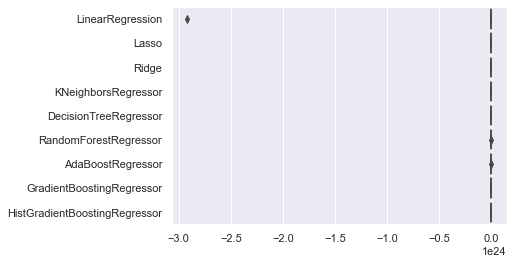

In [7]:
res_df = pd.DataFrame({
    'names' : model_names,
    'scores' : model_scores
})
print('\nmean')
print(res_df.groupby(['names']).mean())
print('\nstd')
print(res_df.groupby(['names']).std())

sns.boxplot(x=model_scores, y=model_names)
plt.show()

In [15]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statistics

names = []
fitting_time = []
pred_time = []
ms_error = []
r2 = []

LinearRegression
Lasso
Ridge
KNeighborsRegressor
DecisionTreeRegressor
RandomForestRegressor


KeyboardInterrupt: 

In [17]:
for model in models:
    model_name = model.__class__.__name__
    print(model_name)
    loo = LeaveOneOut()
    loo_prediction = []
    loo_test = []
    loo_fitting_time = []
    loo_pred_time = []
    i = 0

    for train_index, test_index in loo.split(X_sc):
        i += 1
        X_train, X_test = X_sc[train_index], X_sc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        start_fitting_time = time.time()
        model.fit(X_train, y_train)
        used_fitting_time = time.time() - start_fitting_time

        start_pred_time = time.time()
        y_pred = model.predict(X_test)
        used_pred_time = time.time() - start_pred_time

        loo_prediction.append(y_pred)
        loo_test.append(y_test)
        loo_fitting_time.append(used_fitting_time)
        loo_pred_time.append(used_pred_time)
        if i%100 == 0:
            print(i)

    names.append(model_name)
    fitting_time.append(statistics.mean(loo_fitting_time))
    pred_time.append(statistics.mean(loo_pred_time))
    r2.append(r2_score(loo_test, loo_prediction))
    ms_error.append(mean_squared_error(loo_test, loo_prediction))

print('done')

RandomForestRegressor
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
AdaBoostRegressor
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
GradientBoostingRegressor
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
HistGradientBoostingRegressor
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
done


In [19]:
loo_res = pd.DataFrame({
    'names' : names,
    'fitting_time' : fitting_time,
    'pred_time': pred_time,
    'r2': r2,
    'ms_error': ms_error
})

print(loo_res)

                           names  fitting_time  pred_time        r2  \
0               LinearRegression      0.020958   0.000091  0.843162   
1                          Lasso      0.022453   0.000072  0.843180   
2                          Ridge      0.001474   0.000078  0.843162   
3            KNeighborsRegressor      0.007235   0.000453  0.814409   
4          DecisionTreeRegressor      0.006624   0.000078  0.766210   
5          RandomForestRegressor      3.846341   0.007488  0.917514   
6              AdaBoostRegressor      0.244020   0.001805  0.723806   
7      GradientBoostingRegressor      0.484098   0.000116  0.898402   
8  HistGradientBoostingRegressor      0.636837   0.002268  0.924873   

       ms_error  
0  8.339153e+06  
1  8.338186e+06  
2  8.339150e+06  
3  9.867962e+06  
4  1.243076e+07  
5  4.385830e+06  
6  1.468537e+07  
7  5.402005e+06  
8  3.994529e+06  


In [ ]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(max_iter=35000)
i = 0

loo = LeaveOneOut()
loo_prediction = []
loo_test = []
loo_fitting_time = []
loo_pred_time = []


for train_index, test_index in loo.split(X_sc):
    i += 1
    X_train, X_test = X_sc[train_index], X_sc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    start_fitting_time = time.time()
    model.fit(X_train, y_train)
    used_fitting_time = time.time() - start_fitting_time

    start_pred_time = time.time()
    y_pred = model.predict(X_test)
    used_pred_time = time.time() - start_pred_time

    loo_prediction.append(y_pred)
    loo_test.append(y_test)
    loo_fitting_time.append(used_fitting_time)
    loo_pred_time.append(used_pred_time)
    if i%20 == 0:
        print(i)

names.append(model_name)
fitting_time.append(statistics.mean(loo_fitting_time))
pred_time.append(statistics.mean(loo_pred_time))
r2.append(r2_score(loo_test, loo_prediction))
ms_error.append(mean_squared_error(loo_test, loo_prediction))